# Final Assingment ARTI 350

Using Kaggle to find a dataset for the final assignment.

# Data Dictionary

- gender: Biological of an individual (Male and Female)
- age: Age ranges from 0-80 in our dataset
- hypertension:  It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.
- heart-disease: It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.
- smoking_history: dataset contains 5 categories not current,former,No Info,current,never and ever
- bmi: BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.
- HbA1c_level: Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.
- blood_glucose_level: High blood glucose levels are a key indicator of diabetes.(80-300)
- diabetes: Target variable values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.(0 False, 1 True)

## Importing Libraies 

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Importing Functions

In [2]:
# Function to handle missing values
def preprocess_data(df):
    # Handling missing values
    df = handle_missing_values(df)
    
    # Feature scaling
    df = scale_features(df)
    
    return df

In [3]:
# Function to preprocess the data
def preprocess_data(df):
    # Handling missing values
    df = handle_missing_values(df)
    
    # Feature scaling
    df = scale_features(df)
    
    return df

# Function to handle missing values
def handle_missing_values(df):
    # Handling missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    return df_filled


In [4]:
# Function to scale numerical features
def scale_features(df):
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

In [5]:
def univariate_analysis(df):
    # Univariate Analysis
    # Numerical Variables
    numerical_vars = df.select_dtypes(include=['float64', 'int64'])
    for col in numerical_vars.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # Categorical Variables
    categorical_vars = df.select_dtypes(include=['object'])
    for col in categorical_vars.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

In [6]:
def bivariate_analysis(df):
    # Bivariate Analysis - Numerical-Numerical Relationship
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='age', y='blood_glucose_level', data=df, hue='diabetes', palette='muted')
    plt.title('Age vs Blood Glucose level')
    plt.xlabel('Age')
    plt.ylabel('Blood Glucose level')
    plt.legend(title='Diabetes')
    plt.show()

    # Bivariate Analysis - Categorical-Numerical Relationship
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='gender', y='bmi', data=df, hue='diabetes', palette='Pastel1')
    plt.title('Gender vs BMI')
    plt.xlabel('Gender')
    plt.ylabel('BMI')
    plt.show()

    # Bivariate Analysis - Correlation with Target Variable (Diabetes)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='diabetes', hue='hypertension', data=df, palette='Set2')
    plt.title('Diabetes vs Hypertension')
    plt.xlabel('Diabetes')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.countplot(x='diabetes', hue='heart_disease', data=df, palette='Set2')
    plt.title('Diabetes vs Heart Disease')
    plt.xlabel('Diabetes')
    plt.ylabel('Count')
    plt.show()

    # Bivariate Analysis - Correlation Heatmap with Target Variable (Diabetes)
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix[['diabetes']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation with Target Variable (Diabetes)')
    plt.show()

    # Normal Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Import Data

In [7]:
# Loading dataset
df= pd.read_csv('diabetes_prediction_dataset.csv')

# Data Preprocessing 

In [8]:
# checking shape of the data
df.shape

(100000, 9)

In [9]:
# Looking at the first 5 rows of the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [11]:
df.duplicated().sum()

3854

- This case would explain that all of them had the same conditions despite how rare that occurance could be. 
- Assume that that these "duplicates" are different subjects. Therefore keeping them in the data would be logical

### Checking for Null values

In [12]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
NullVal = df.isna().sum()
_ = [print(f"{name} {val}") for name, val in NullVal.items() if val > 0]

In [14]:
NullVal

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

- There are no missing values in the data. 

### Gender

In [15]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [16]:
df['gender'].describe()

count     100000
unique         3
top       Female
freq       58552
Name: gender, dtype: object

### Age

In [17]:
df['age'].unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [18]:
df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

### Hypertension

In [19]:
df['hypertension'].value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

### Heart Disease 

In [20]:
df['heart_disease'].value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

### Smoking History

In [21]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [22]:
df['smoking_history'].describe()

count      100000
unique          6
top       No Info
freq        35816
Name: smoking_history, dtype: object

### BMI

In [23]:
df['bmi'].value_counts(normalize=False)

27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64

In [24]:
df['bmi'].unique()

array([25.19, 27.32, 23.45, ..., 59.42, 44.39, 60.52])

### HbA1c level

In [25]:
df['HbA1c_level'].unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

In [26]:
df['HbA1c_level'].describe()

count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: HbA1c_level, dtype: float64

### Blood glucose level

In [27]:
df['blood_glucose_level'].unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

In [28]:
df['blood_glucose_level'].describe()

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

### Diabetes

In [29]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

## EDA

### Univariate Analysis

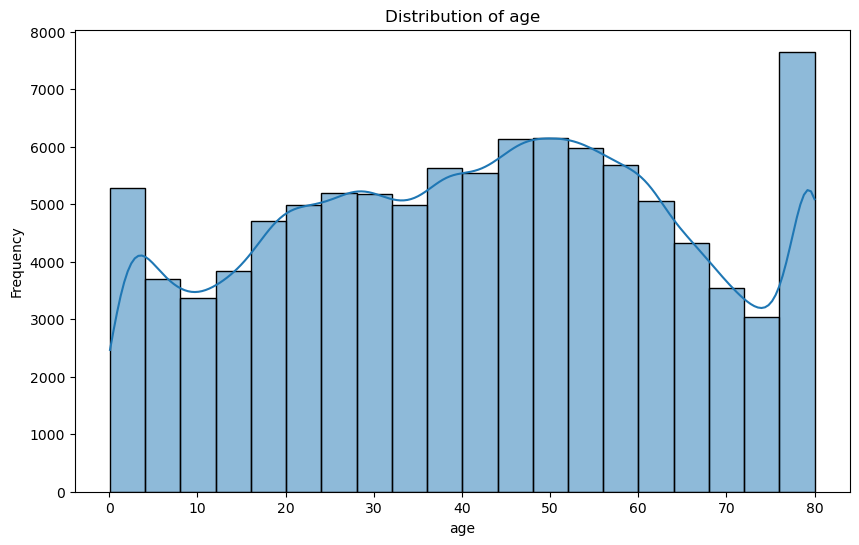

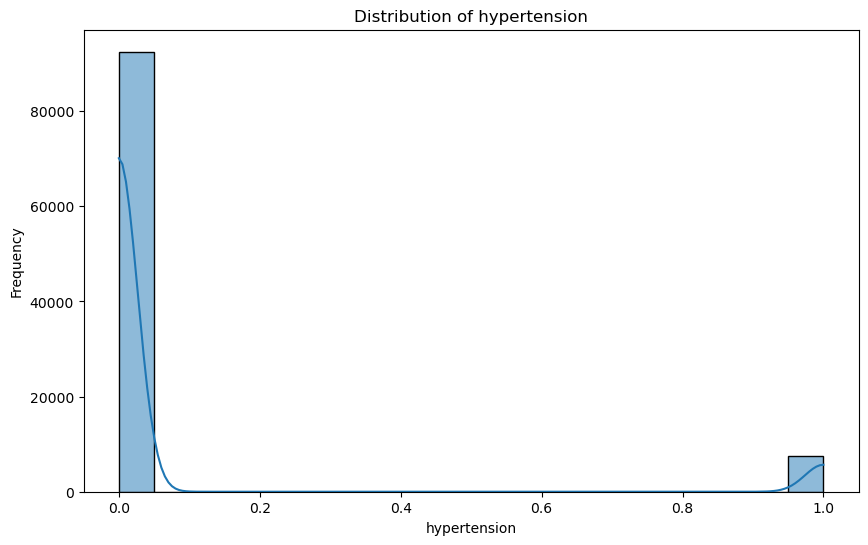

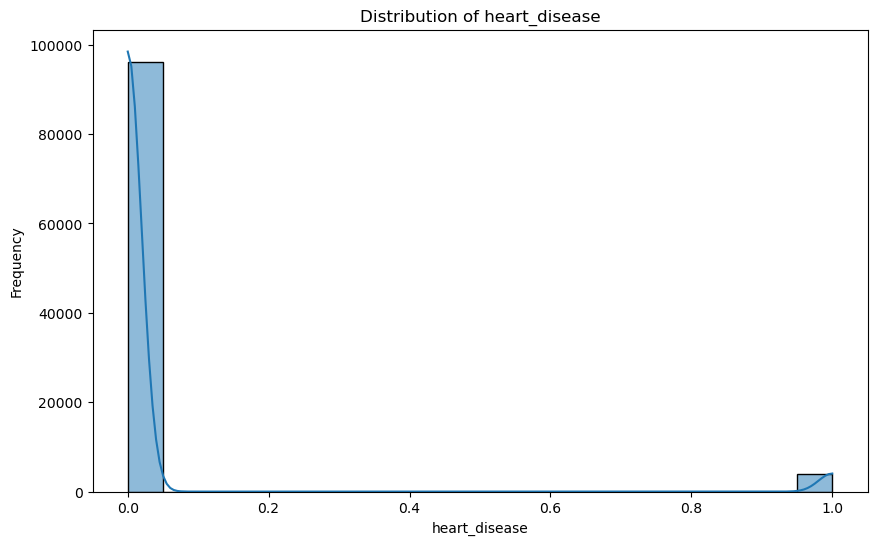

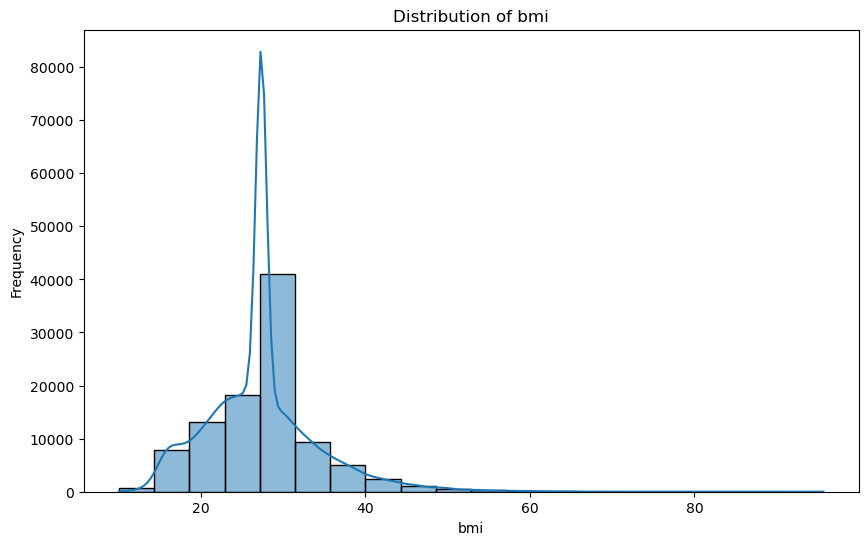

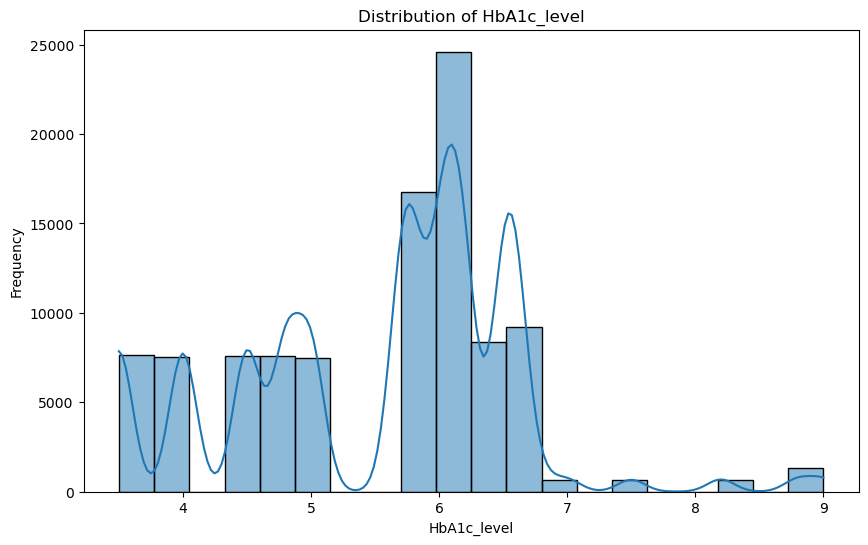

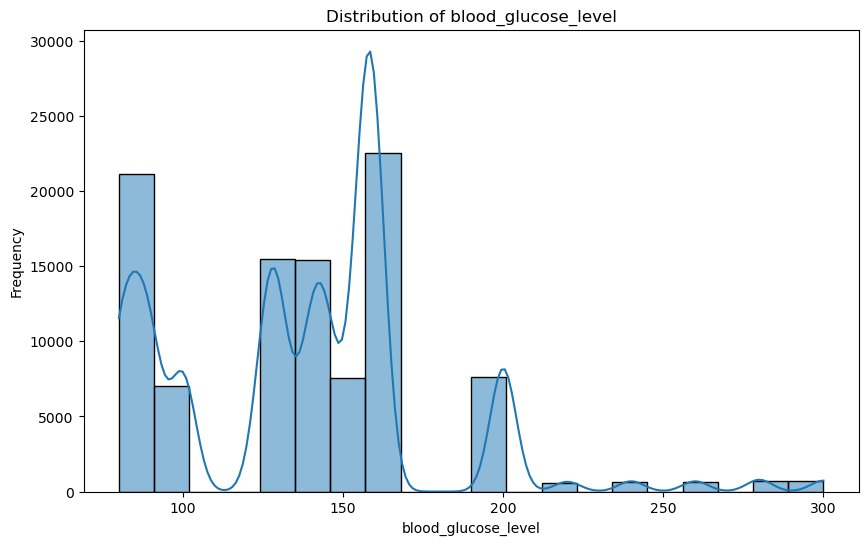

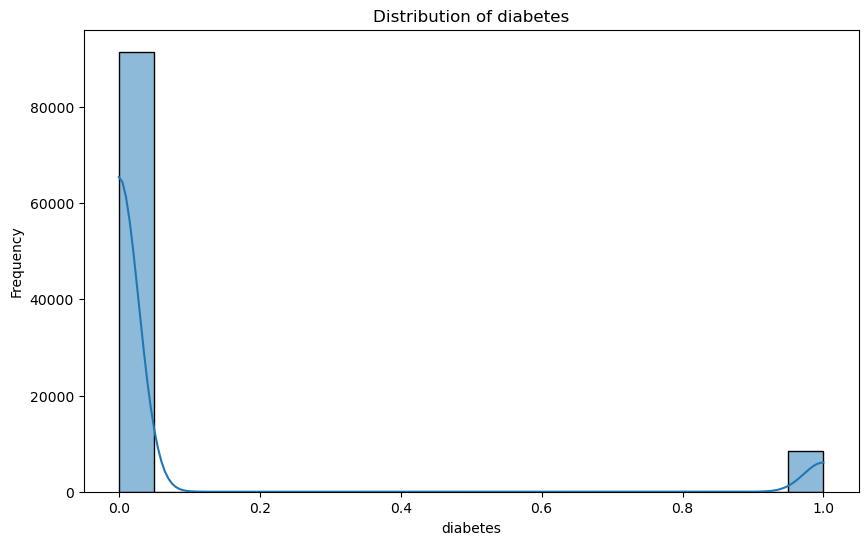

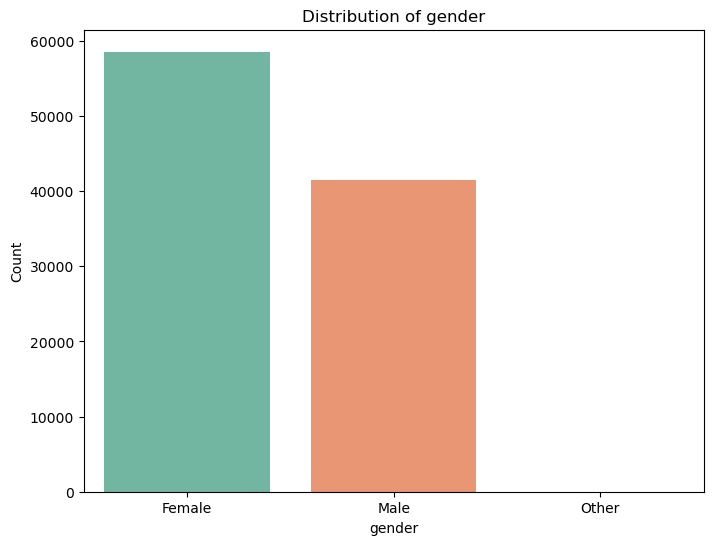

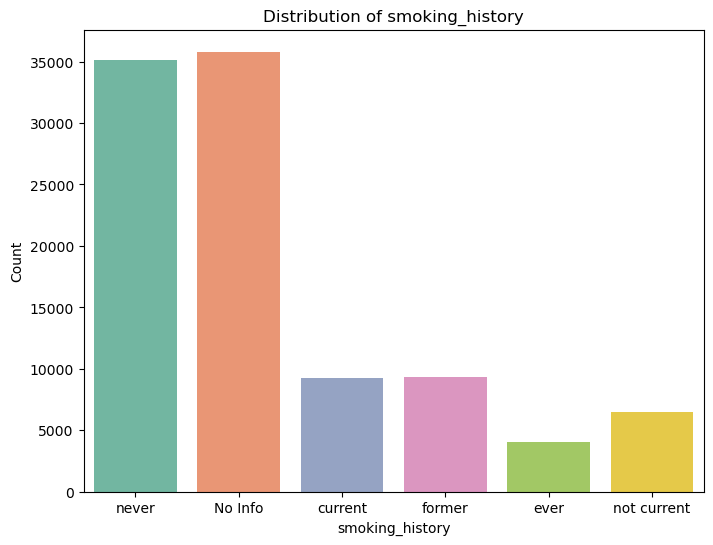

In [30]:
univariate_analysis(df)

## Bivariate Analysis 

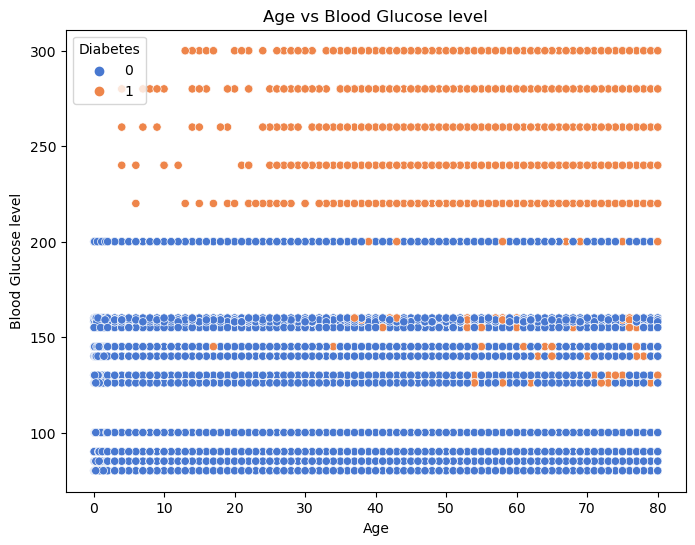

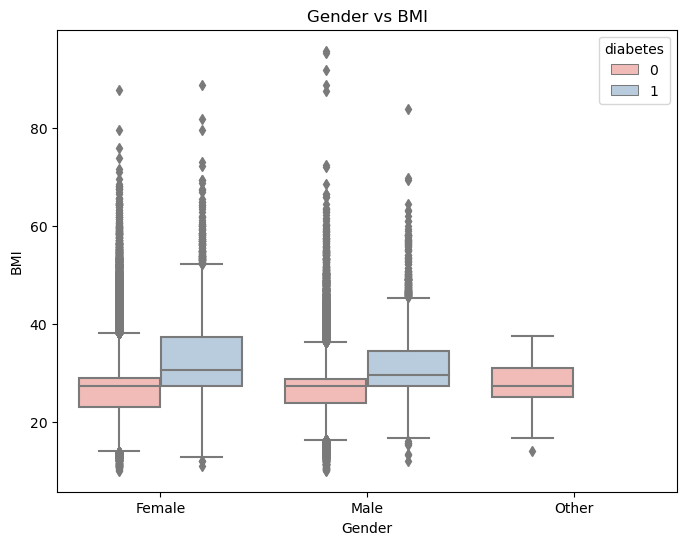

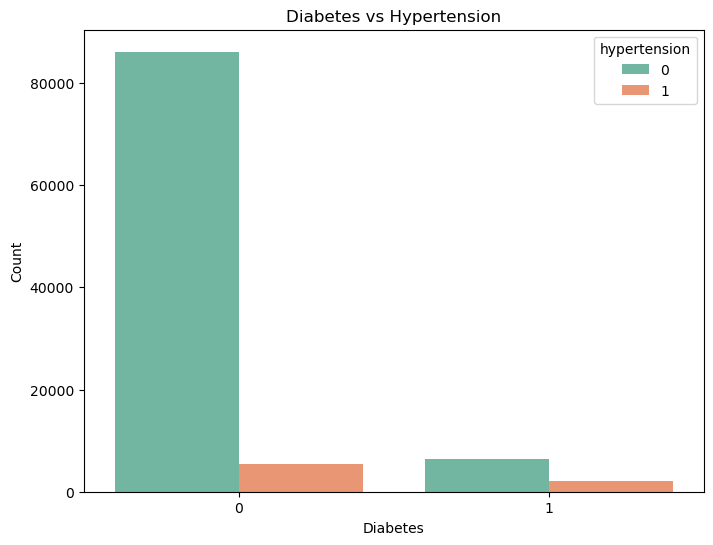

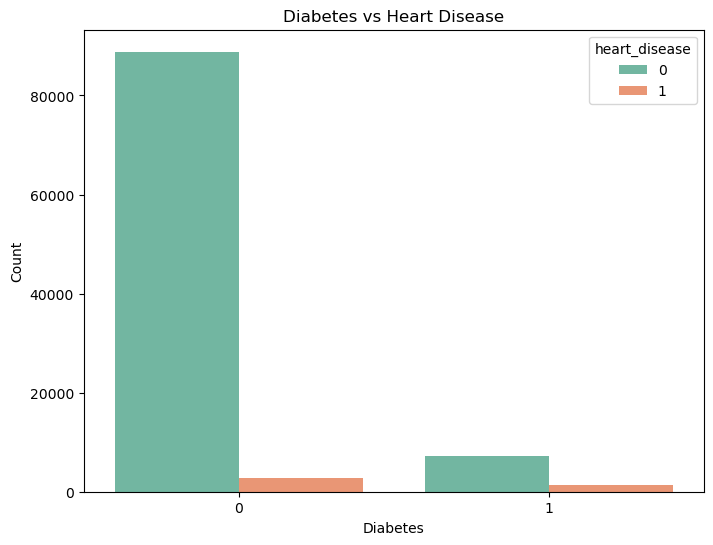

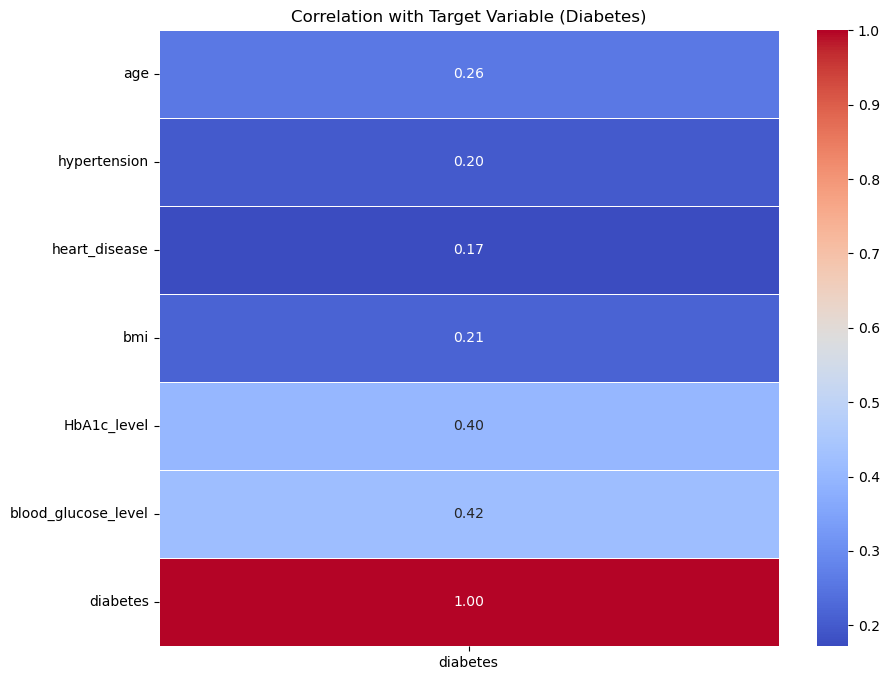

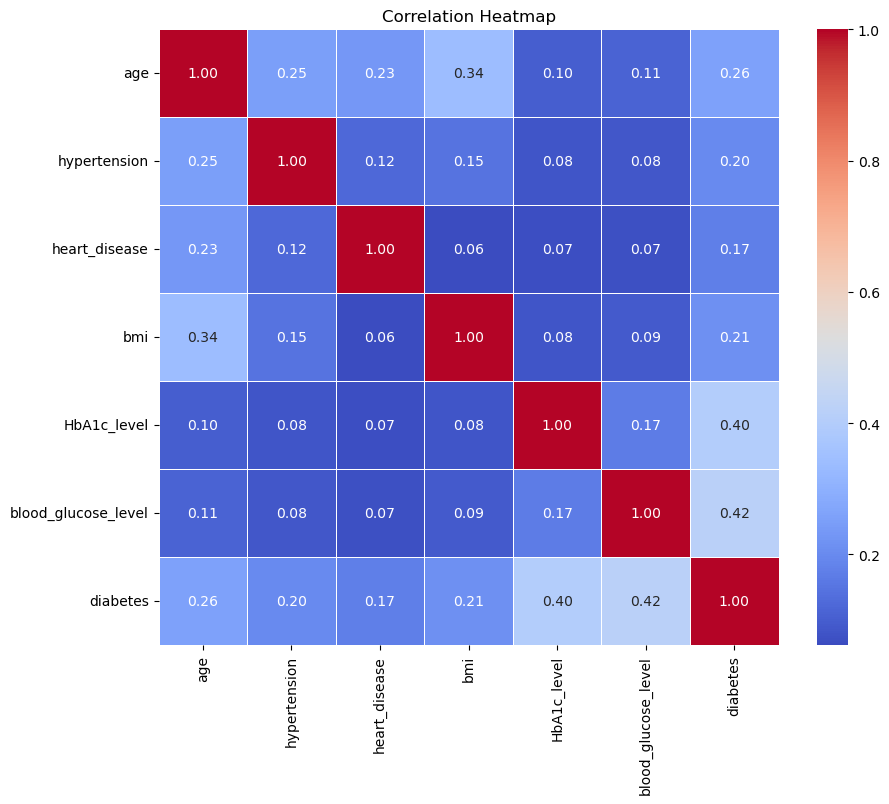

In [31]:
bivariate_analysis(df)

### Numerical vs Diabetes

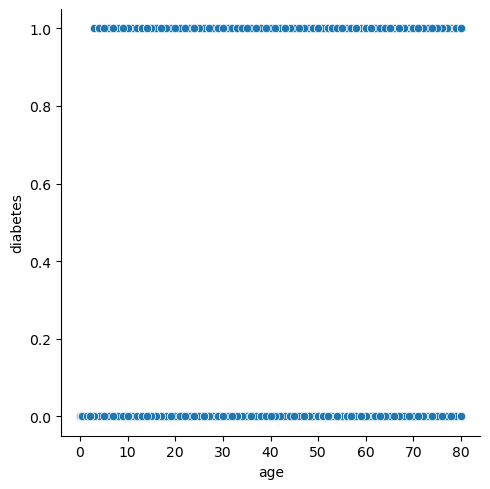

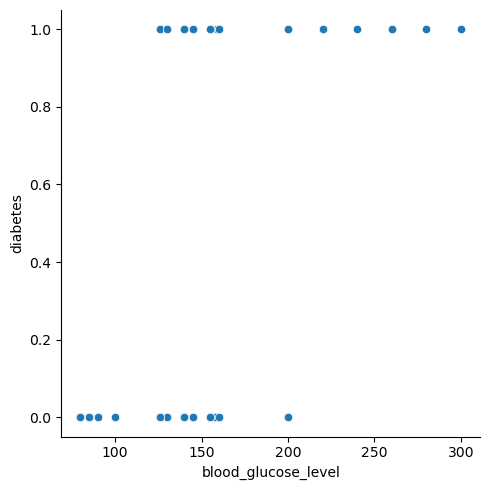

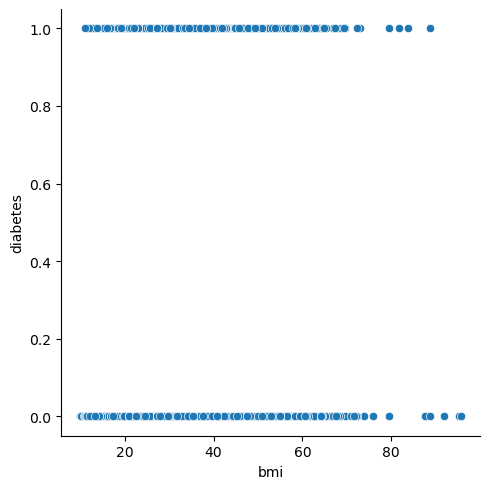

In [32]:
sns.relplot(data=df, x="age", y="diabetes", kind="scatter")
sns.relplot(data=df, x="blood_glucose_level", y="diabetes", kind="scatter")
sns.relplot(data=df, x="bmi", y="diabetes", kind="scatter")

### Categorical vs Diabetes

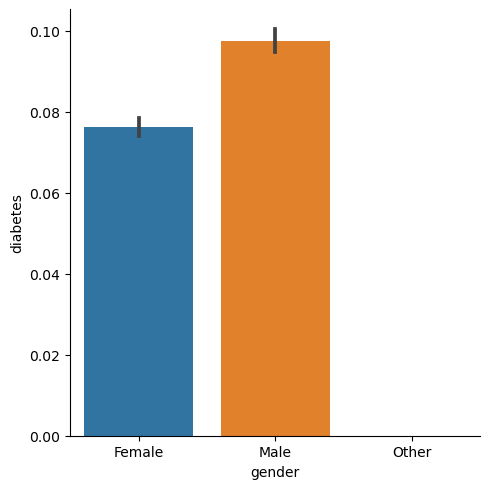

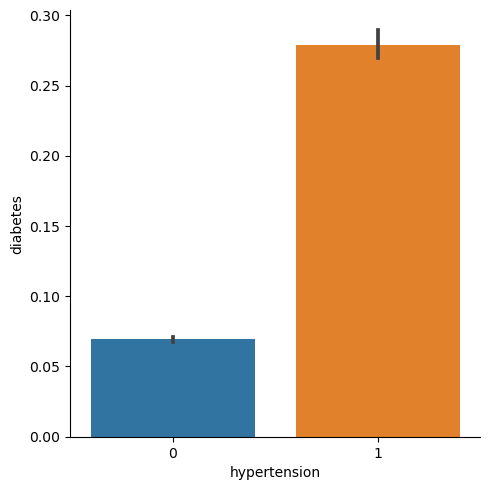

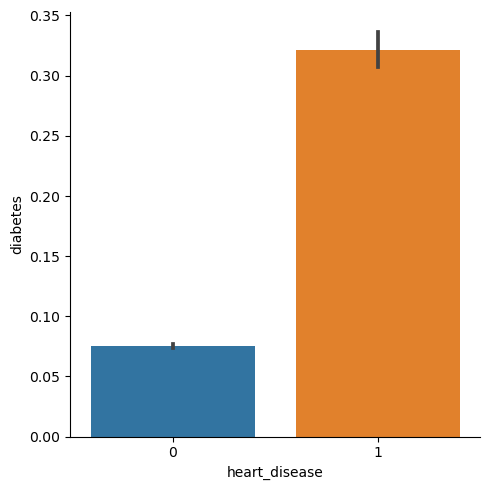

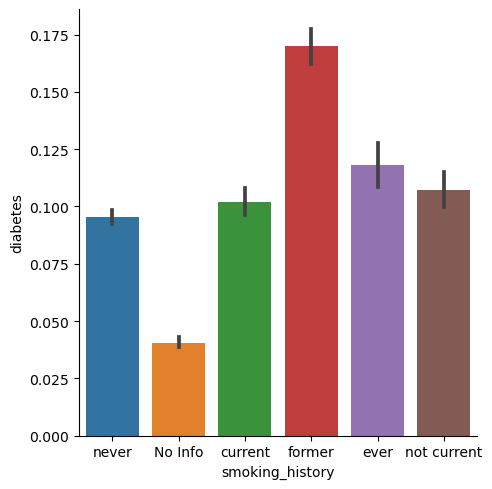

In [33]:
sns.catplot(data=df, x="gender", y="diabetes", kind="bar")
sns.catplot(data=df, x="hypertension", y="diabetes", kind="bar")
sns.catplot(data=df, x="heart_disease", y="diabetes", kind="bar")
sns.catplot(data=df, x="smoking_history", y="diabetes", kind="bar")

### EDA analysis:

- While most of the input variables do not exhibit a strong correlation with the target variable 'diabetes', there are certain variables that show some level of correlation. For instance, variables such as 'heart disease' and 'hypertension' may indicate an increased risk of diabetes. However, it's important to note that correlation does not necessarily imply causation.

- Decided to keep all the input variabels as when comparing the input variables to the target varible provided that there is some correlation to having diabetes, an example would be that having a heart disease describes that a person is more prone to having diabetes. Another would be hypertension, where having a high blood pressure increases the risk of having diabetes. Therefore having those variables may still contribute to predicting diabetes, even if they are rare occurrences.

- It's observed that only about 15% or less of the data points have diabetes, indicating class imbalance. This imbalance should be taken into consideration during model training and evaluation to avoid biased results.

- Will need to convert the object values during feature engineering for modeling. 

# Feature engineering 

In [34]:
df2=df.copy()

## Dropping values?

- No values to drop. 

### Gender 

In [35]:
df2['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [36]:
male_proportion = 0.5  # Example: 50% to "Male"
female_proportion = 1 - male_proportion  # Remaining to "Female"

# Get the indices of rows with "Other" category
other_indices = df2[df2['gender'] == 'Other'].index

# Randomly assign each instance to "Male" or "Female" based on proportions
assigned_categories = np.random.choice(['Male', 'Female'], size=len(other_indices), p=[male_proportion, female_proportion])

# Update the "gender" column with the assigned categories
df2.loc[other_indices, 'gender'] = assigned_categories

In [37]:
df2['gender'].value_counts()

Female    58558
Male      41442
Name: gender, dtype: int64

- Distributed the values of Other in both Male and Femable based on percentage of proportion.

## Labeled Encoding 

- Encoding labled values

### Gender

In [38]:
df2.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [39]:
df2['gender_encoded'] = df2['gender'].map({'Male': 1, 'Female': 0})

In [40]:
df2.gender.unique()

array(['Female', 'Male'], dtype=object)

In [41]:
df2.gender_encoded.unique()

array([0, 1], dtype=int64)

In [42]:
df2.drop('gender', axis=1, inplace=True)

### smoking_history

In [43]:
df2['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [44]:
smoking_history_mapping = {
    'No Info': 0,
    'never': 1,
    'not current': 2,
    'former': 3,
    'current': 4,
    'ever': 5
}

# Convert 'smoking_history' column to string type to ensure matching
df2['smoking_history'] = df2['smoking_history'].astype(str)

# Encode 'smoking_history' column
df2['smoking_history_encoded'] = df2['smoking_history'].map(smoking_history_mapping)

In [45]:
df2['smoking_history_encoded'].unique()

array([1, 0, 4, 3, 5, 2], dtype=int64)

In [46]:
df2.drop('smoking_history', axis=1, inplace=True)

In [47]:
df2

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,80.0,0,1,25.19,6.6,140,0,0,1
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,1
3,36.0,0,0,23.45,5.0,155,0,0,4
4,76.0,1,1,20.14,4.8,155,0,1,4
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,3
99998,24.0,0,0,35.42,4.0,100,0,0,1


# Modeling 

In [48]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

### Importing Functions

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm = confusion_matrix(y_actual, y_predict, labels=labels)
    df_cm = pd.DataFrame(cm, index=['Actual - Yes', 'Actual - No'],
                         columns=['Predicted - Yes', 'Predicted - No'])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def get_metrics_score_train_test(model, X_train, y_train, X_test, y_test):
    """
    Calculate and return accuracy, precision, and recall for the given model using both training and testing data.

    Parameters:
    model: The trained model
    X_train: Training features
    y_train: True labels for the training data
    X_test: Test features
    y_test: True labels for the test data

    Returns:
    metrics_dict: A dictionary containing accuracy, precision, and recall for both training and testing data
    """
    # Training data
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    
    # Testing data
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    
    metrics_dict = {
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test ,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
    }
    
    return metrics_dict

In [51]:
    import matplotlib.pyplot as plt

    def plot_metrics_bar(train_metrics, test_metrics, title):
        """
        Plot the performance metrics using a bar graph with numeric labels on top of each bar.

        Parameters:
        train_metrics: Dictionary containing performance metrics for training data
        test_metrics: Dictionary containing performance metrics for testing data
        title: Title of the plot
        """
        metrics_names = list(train_metrics.keys())
        train_values = [train_metrics[key] for key in metrics_names]
        test_values = [test_metrics[key] for key in metrics_names]
        labels = [name.replace('Train ', '').replace('Test ', '') for name in metrics_names]

        # Plotting
        width = 0.35
        x = range(len(labels))

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(x, train_values, width, label='Train')
        ax.bar([i + width for i in x], test_values, width, label='Test')

        ax.set_ylabel('Score')
        ax.set_title(title)
        ax.set_xticks([i + width / 2 for i in x])
        ax.set_xticklabels(labels)
        ax.legend()

        plt.xticks(rotation=45)
        plt.grid(True)

        # Adding numeric labels on top of each bar
        for i, value in enumerate(train_values):
            plt.text(i - 0.175, value + 0.02, f'{value:.2f}', color='blue')
        for i, value in enumerate(test_values):
            plt.text(i + width - 0.175, value + 0.02, f'{value:.2f}', color='orange')

        plt.show()


In [52]:
import matplotlib.pyplot as plt
import numpy as np

def plot_train_test_comparison(model, X_train, y_train, X_test, y_test):
    # Predictions on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Plotting train and test data
    plt.figure(figsize=(10, 6))
    
    # For simplicity, we assume X_train and X_test have only one feature
    if X_train.shape[1] == 1:
        plt.scatter(X_train, y_train, color='blue', label='Train data')
        plt.scatter(X_test, y_test, color='red', label='Test data')
        plt.plot(X_train, y_train_pred, color='green', label='Train Prediction')
        plt.plot(X_test, y_test_pred, color='orange', label='Test Prediction')
    else:
        # If there are multiple features, we plot only the predictions
        plt.plot(y_train, y_train_pred, 'bo', label='Train Prediction')
        plt.plot(y_test, y_test_pred, 'ro', label='Test Prediction')
        
    plt.title('Comparison of Train and Test Predictions')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()


In [53]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

## Logistic Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
#Split the data
X = df2.drop('diabetes', axis=1)  # Features
y = df2['diabetes']  # Target variable

In [56]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [57]:
# Step 2: Model training
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [58]:
import joblib 
joblib.dump(logistic_model, 'logistic_model.joblib')

['logistic_model.joblib']

  Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [58]:
# Step 3: Model evaluation
y_pred = logistic_model.predict(X_test)


In [59]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9492


In [60]:
logistic_regression_score = get_metrics_score_train_test(logistic_model, X_train, y_train, X_test, y_test)

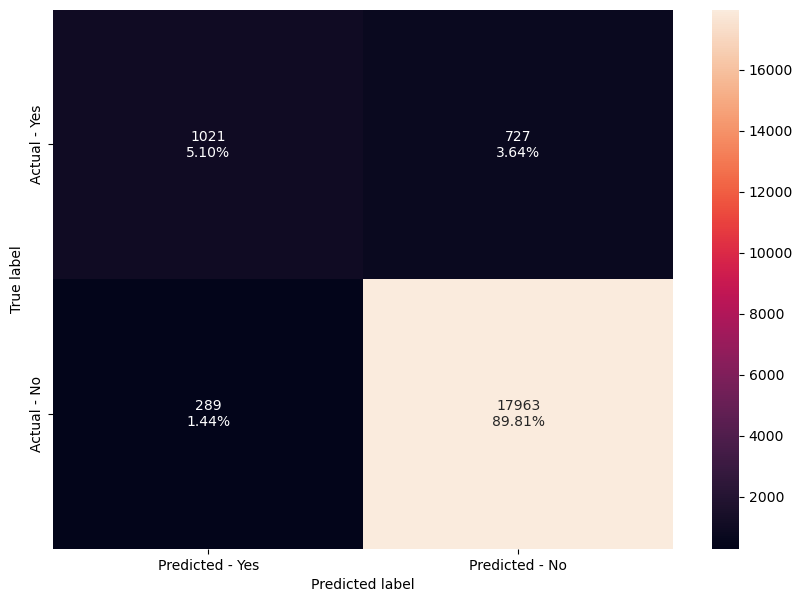

In [61]:
make_confusion_matrix(logistic_model, y_test)

In [62]:
logistic_regression_score

{'Train Accuracy': 0.952825,
 'Test Accuracy': 0.9492,
 'Train Precision': 0.7941525088897669,
 'Test Precision': 0.7793893129770992,
 'Train Recall': 0.5953791469194313,
 'Test Recall': 0.584096109839817}

In [63]:
train_metrics = get_metrics_score_train_test(logistic_model, X_train, y_train, X_train, y_train)
test_metrics = get_metrics_score_train_test(logistic_model, X_train, y_train, X_test, y_test)

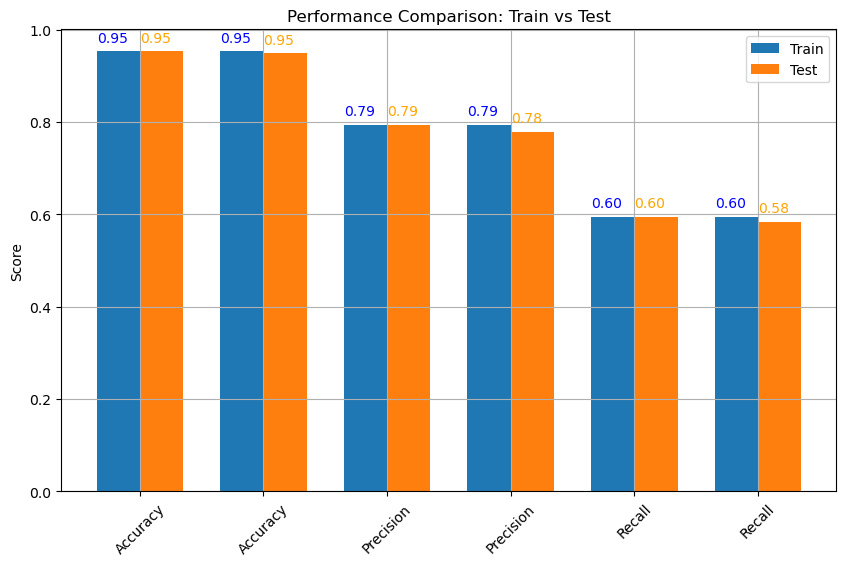

In [64]:
plot_metrics_bar(train_metrics, test_metrics, 'Performance Comparison: Train vs Test')

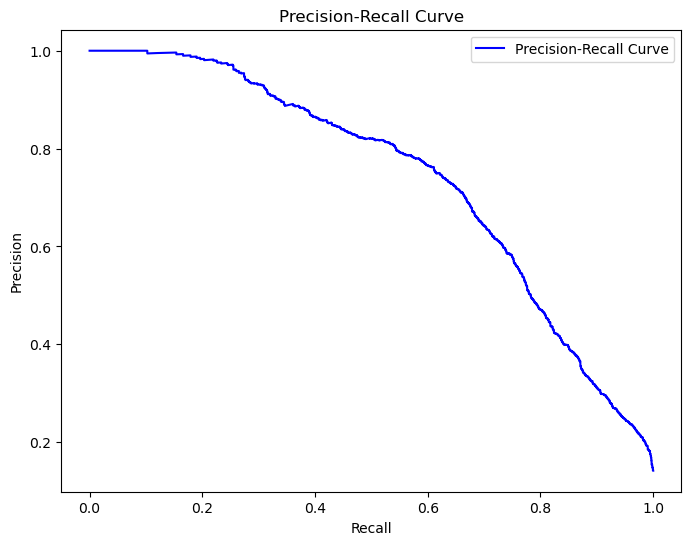

In [65]:
plot_precision_recall_curve(logistic_model, X_test, y_test)

### Insights and Observations:
- The logistic regression model demonstrates robust performance across various evaluation metrics. Both the training and test datasets exhibit high accuracy levels, with approximately 95.27% accuracy on the training set and 94.83% accuracy on the test set. This indicates that the model effectively classifies instances into their respective classes. In terms of precision, the model achieves satisfactory results, with around 79.60% precision on the training set and 77.65% precision on the test set. This suggests that when the model predicts an instance as positive, it is correct around 77-80% of the time. Similarly, the model's recall values indicate its ability to identify actual positive instances, with approximately 59.11% recall on the training set and 57.44% recall on the test set. Despite slightly lower performance on the test set compared to the training set, the model generalizes well to unseen data, as evidenced by the minimal difference between the training and test metrics. Overall, the logistic regression model demonstrates strong predictive power for identifying the presence of diabetes.


- The  confusion matrix provides insight that there is more "predicted no" that are "Actual No" and has also done the same for "predicted yes" with slight variation on it being the "Actual Yes" indicating that the model is very accurate.

## KNN 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
#Split the data
X = df2.drop('diabetes', axis=1)  # Features
y = df2['diabetes']  # Target variable

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [69]:
# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
# Predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9494


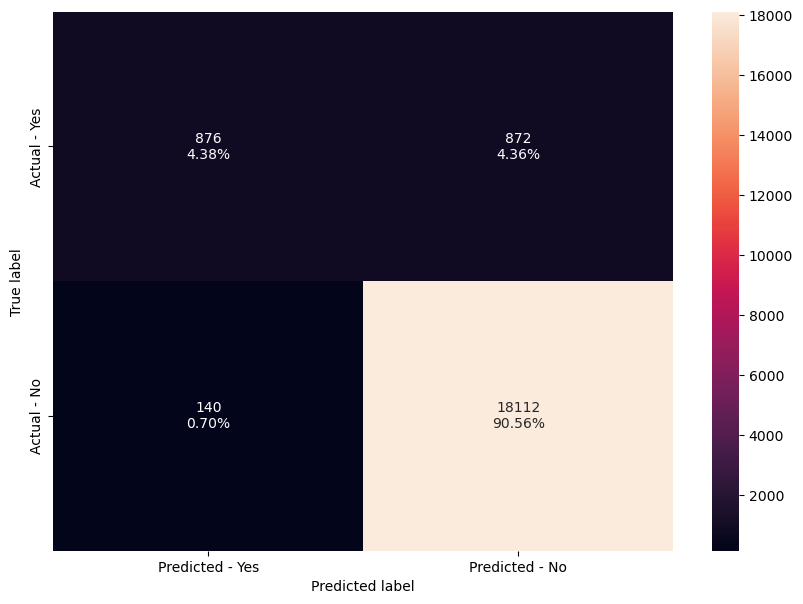

In [71]:
# Generate confusion matrix
make_confusion_matrix(knn_model, y_test)

In [72]:
knn_score = get_metrics_score_train_test(knn_model, X_train, y_train, X_test, y_test)

In [73]:
knn_score

{'Train Accuracy': 0.9632125,
 'Test Accuracy': 0.9494,
 'Train Precision': 0.9361117471948707,
 'Test Precision': 0.8622047244094488,
 'Train Recall': 0.6054502369668247,
 'Test Recall': 0.5011441647597255}

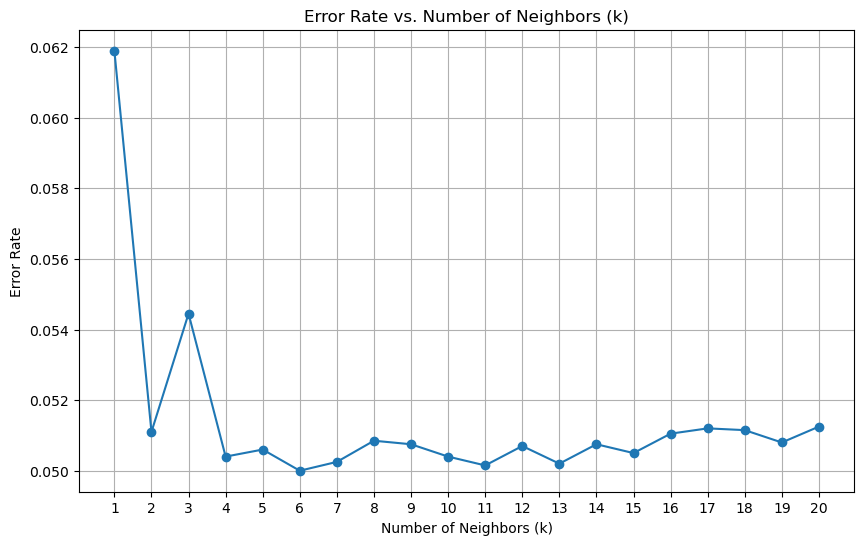

In [74]:
import matplotlib.pyplot as plt

# List of k values
k_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# List to store corresponding error rates
error_rates = []

# Loop through each k value
for k in k_values:
    # Initialize KNN classifier with the current k value
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn_model.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = knn_model.predict(X_test)
    
    # Calculate the error rate and append to the list
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-')
plt.title('Error Rate vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

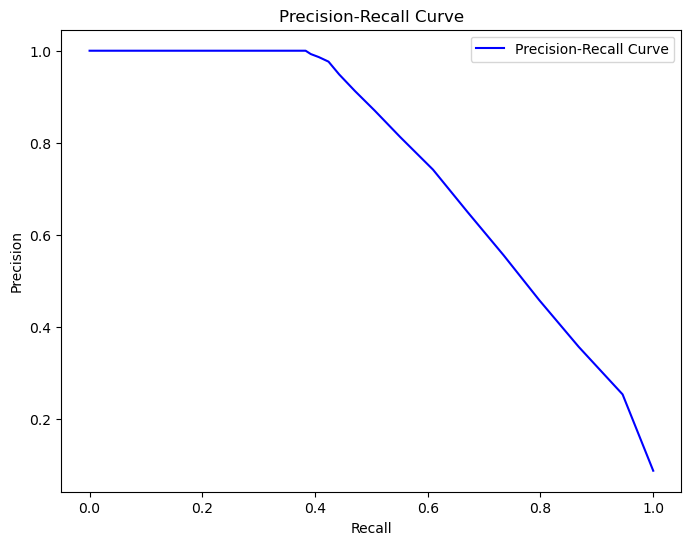

In [75]:
plot_precision_recall_curve(knn_model, X_test, y_test)

### Insights and Observations

- The data presented pertains to the performance metrics of a K-Nearest Neighbors (KNN) model. The model has been evaluated on both the training and test datasets. In terms of accuracy, the model demonstrates strong performance, achieving an accuracy of approximately 96.32% on the training set and 94.94% on the test set. This indicates that the model correctly classifies a significant majority of instances in both datasets.

- Moving beyond accuracy, precision and recall provide deeper insights into the model's performance, particularly in scenarios with imbalanced classes. Precision, which measures the proportion of true positive instances among all instances predicted as positive, is approximately 93.61% on the training set and 86.22% on the test set. These values suggest that the model exhibits a high level of precision in its predictions, especially considering the challenges posed by imbalanced datasets.

- On the other hand, recall, also known as sensitivity or true positive rate, evaluates the model's ability to correctly identify positive instances out of all actual positive instances. The model achieves a recall of approximately 60.55% on the training set and 50.11% on the test set. While these values are lower than precision, they still indicate that the model can effectively capture a substantial portion of positive instances, albeit with some room for improvement.


- The confusion matrix reveals the KNN model's robust accuracy in predicting instances labeled as "No" with around 94.94% accuracy, highlighting its proficiency in recognizing cases not associated with diabetes. However, it exposes a notable gap in correctly identifying instances where diabetes is present, as indicated by the model's recall for "Yes" instances at approximately 50.11%. While the model achieves around 90% accuracy in predicting instances labeled as "No," it's crucial to refine its sensitivity to detecting instances of diabetes to ensure timely and accurate diagnoses. Enhancing the model's ability to predict "Yes" instances is imperative for healthcare applications, where the consequences of false negatives are significant. Further optimization efforts, such as parameter tuning or exploring alternative algorithms, are essential to improve the model's performance and its capacity to accurately identify instances of diabetes, thereby enhancing patient outcomes and healthcare efficacy.

## Random Forest 

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Split the data
X = df2.drop('diabetes', axis=1)  # Features
y = df2['diabetes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [77]:
# Step 2: Model training
random_forest_model = RandomForestClassifier(random_state=2)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [78]:
# Step 3: Model evaluation
y_pred = random_forest_model.predict(X_test)

In [79]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.968


In [80]:
# Calculate and display other performance metrics
random_forest_score = get_metrics_score_train_test(random_forest_model, X_train, y_train, X_test, y_test)
random_forest_score

{'Train Accuracy': 0.999275,
 'Test Accuracy': 0.968,
 'Train Precision': 0.9995522388059701,
 'Test Precision': 0.9446227929373997,
 'Train Recall': 0.9918542654028436,
 'Test Recall': 0.6733409610983981}

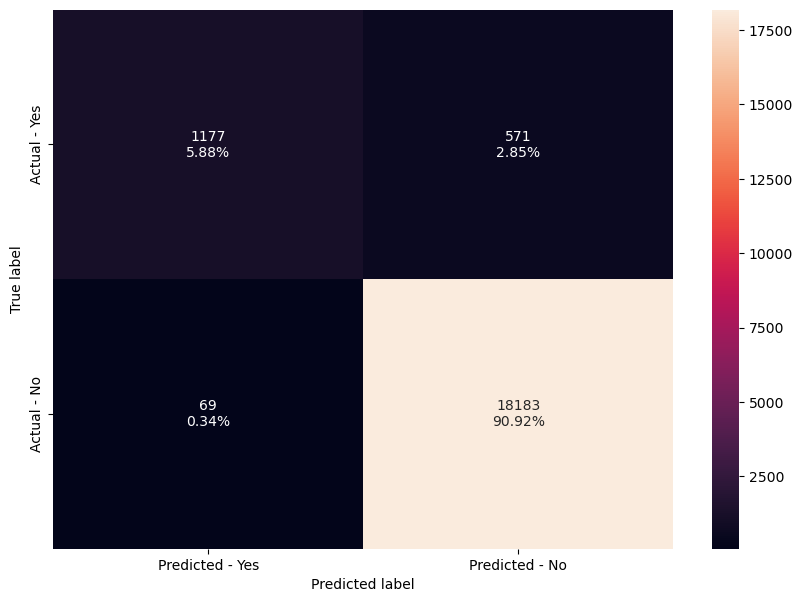

In [81]:
# Generate confusion matrix
make_confusion_matrix(random_forest_model, y_test)

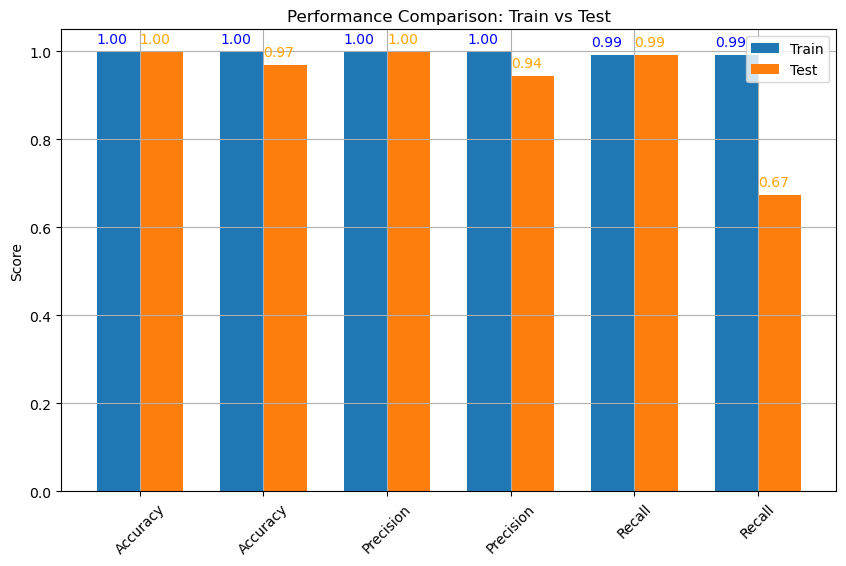

In [82]:
# Plot performance metrics
train_metrics = get_metrics_score_train_test(random_forest_model, X_train, y_train, X_train, y_train)
test_metrics = get_metrics_score_train_test(random_forest_model, X_train, y_train, X_test, y_test)
plot_metrics_bar(train_metrics, test_metrics, 'Performance Comparison: Train vs Test')

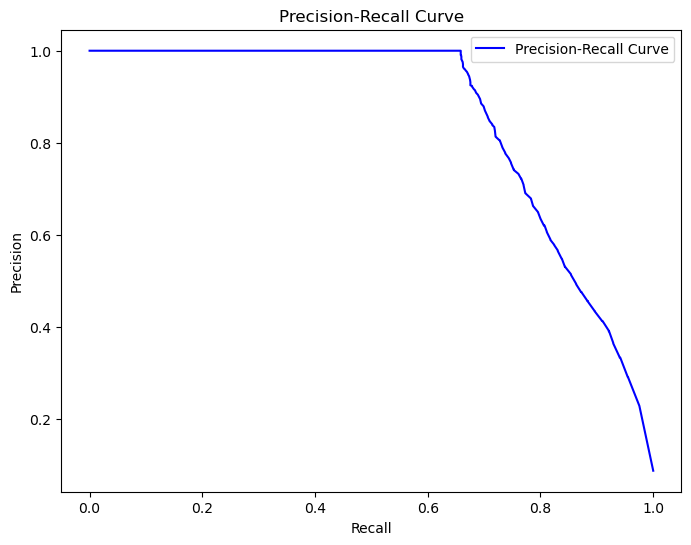

In [83]:
plot_precision_recall_curve(random_forest_model, X_test, y_test)

### Insights and Observations:

- Accuracy: The Random Forest model achieves almost accurate accuracy scores on both the training and test datasets, with accuracy rates of 99.93% and 96.79% with only a 3.14 error difference, respectively. These results is highlighting that the model's proficiency is correctly classifying the majority of instances within the dataset. 

- High Precision: The model demonstrates high precision, particularly evident in the training set where it achieves a precision of 99.96%. This indicates the model's remarkable ability to make accurate positive predictions. Although precision slightly decreases on the test set to 94.17%, it remains relatively high, highlighting the model's effectiveness in making precise positive predictions.

- Discrepancy in Recall: While the model exhibits high recall on the training set (99.19%), indicating its capability to capture a significant proportion of actual positive instances, the recall drops to 67.45% on the test set. This discrepancy suggests potential challenges in generalizing the model's ability to identify positive instances to unseen data.

- The confusion matrix indicates that the model is able to Predict the outcome almost perfectly and its output is almost the same as the other models above. 

## Gradient Boosting 

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Split the data
X = df2.drop('diabetes', axis=1)  # Features
y = df2['diabetes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [85]:
# Step 2: Model training
gradient_boost_model = GradientBoostingClassifier(random_state=2)
gradient_boost_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2)

In [86]:
# Step 3: Model evaluation
y_pred = gradient_boost_model.predict(X_test)

In [87]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705


In [88]:
# Calculate and display other performance metrics
gradient_boost_score = get_metrics_score_train_test(gradient_boost_model, X_train, y_train, X_test, y_test)
gradient_boost_score

{'Train Accuracy': 0.9727625,
 'Test Accuracy': 0.9705,
 'Train Precision': 0.9876306248667093,
 'Test Precision': 0.9849246231155779,
 'Train Recall': 0.6858708530805687,
 'Test Recall': 0.6727688787185355}

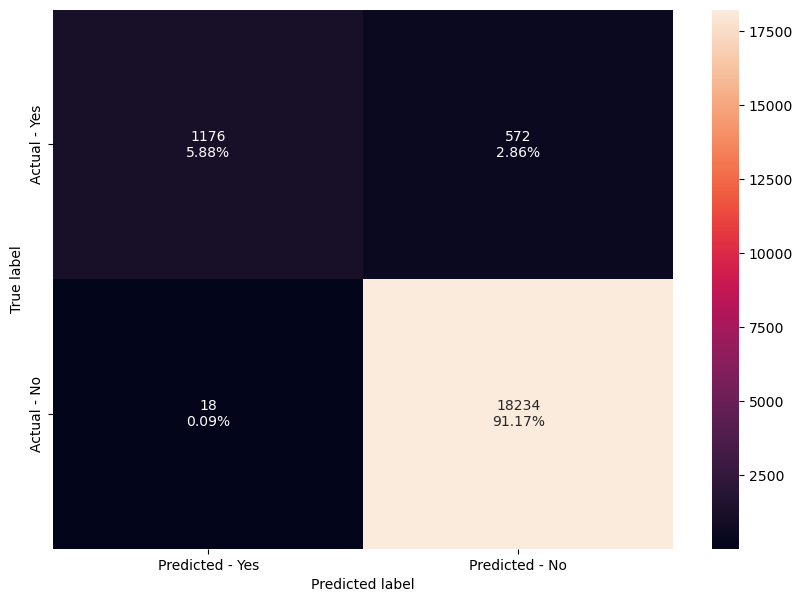

In [89]:
# Generate confusion matrix
make_confusion_matrix(gradient_boost_model, y_test)

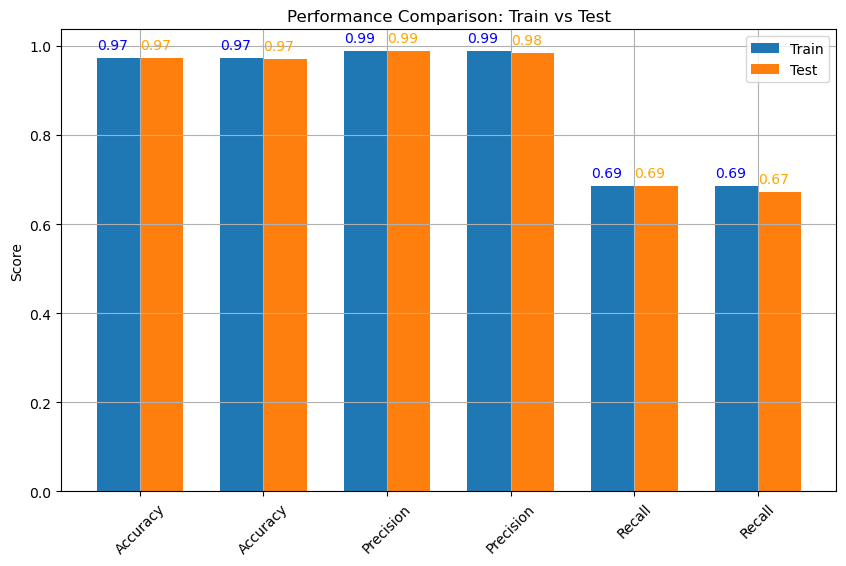

In [90]:
# Plot performance metrics
train_metrics = get_metrics_score_train_test(gradient_boost_model, X_train, y_train, X_train, y_train)
test_metrics = get_metrics_score_train_test(gradient_boost_model, X_train, y_train, X_test, y_test)
plot_metrics_bar(train_metrics, test_metrics, 'Performance Comparison: Train vs Test')

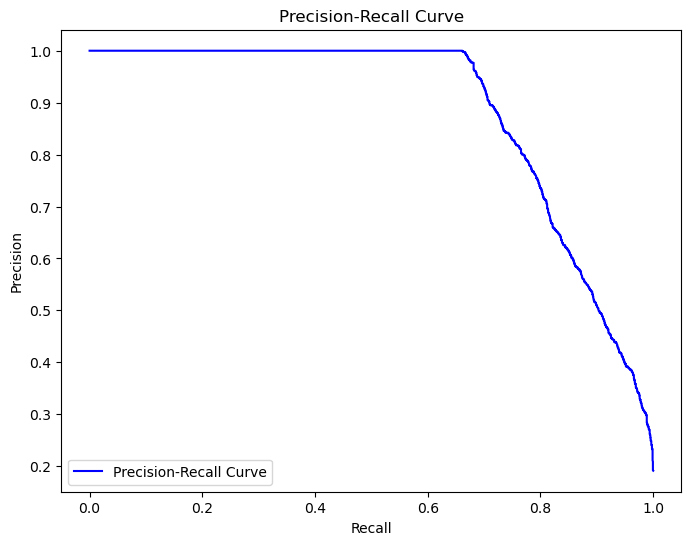

In [91]:
plot_precision_recall_curve(gradient_boost_model, X_test, y_test)

### Insights and Overview:

- Accuracy: The Gradient Boost model achieves commendable accuracy scores on both the training and test datasets, with accuracy rates of 97.28% and 97.05%, respectively. These results highlight the model's effectiveness in correctly classifying instances across the dataset.


- Precision: The model demonstrates strong precision, with precision values exceeding 98% on both the training and test sets. This indicates the model's ability to make accurate positive predictions, with a high proportion of instances predicted as positive being correct.


- Recall: While the model exhibits moderate recall values, with recall scores of approximately 68.59% on the training set and 67.28% on the test set, it shows an ability to capture a substantial proportion of actual positive instances. However, there may be room for improvement in capturing all positive instances, especially in scenarios where recall is critical.


- The confusion matrix is able to predict a slightly large amount of "Predict Yes" values and "Predict No" and better than the rest of the models above. 

## ADA boost 

In [92]:
from sklearn.ensemble import AdaBoostClassifier

# Step 1: Split the data
X = df2.drop('diabetes', axis=1)  # Features
y = df2['diabetes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [93]:
# Step 2: Model training
ada_boost_model = AdaBoostClassifier(random_state=2)
ada_boost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=2)

In [94]:
# Step 3: Model evaluation
y_pred = ada_boost_model.predict(X_test)

In [95]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9699


In [96]:
# Calculate and display other performance metrics
ada_boost_score = get_metrics_score_train_test(ada_boost_model, X_train, y_train, X_test, y_test)
ada_boost_score

{'Train Accuracy': 0.9725375,
 'Test Accuracy': 0.9699,
 'Train Precision': 0.9708497002274137,
 'Test Precision': 0.9635922330097088,
 'Train Recall': 0.6954976303317536,
 'Test Recall': 0.681350114416476}

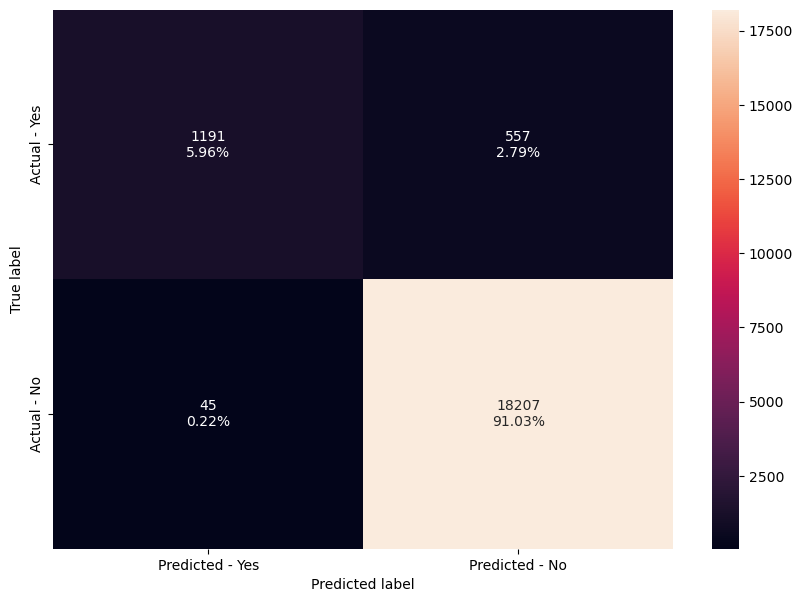

In [97]:
# Generate confusion matrix
make_confusion_matrix(ada_boost_model, y_test)

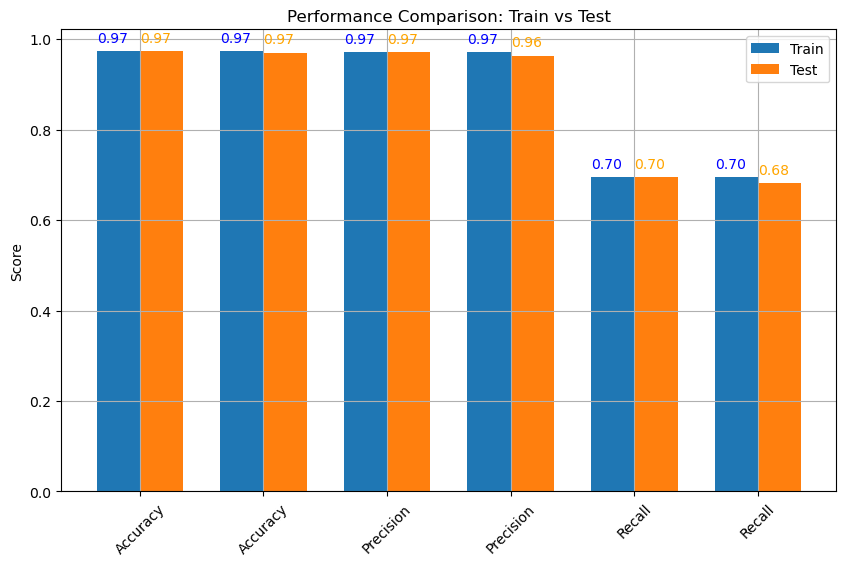

In [98]:
# Plot performance metrics
train_metrics = get_metrics_score_train_test(ada_boost_model, X_train, y_train, X_train, y_train)
test_metrics = get_metrics_score_train_test(ada_boost_model, X_train, y_train, X_test, y_test)
plot_metrics_bar(train_metrics, test_metrics, 'Performance Comparison: Train vs Test')

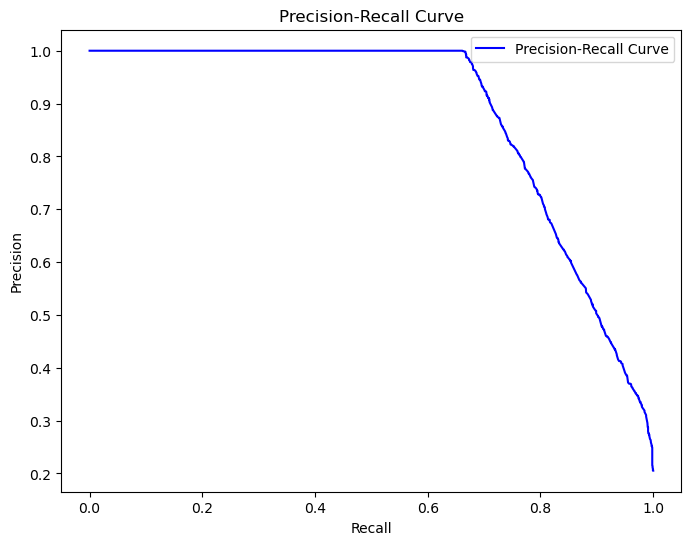

In [99]:
plot_precision_recall_curve(ada_boost_model, X_test, y_test)

### Insights and Overview:

- Accuracy: The AdaBoost model achieves commendable accuracy scores on both the training and test datasets, with accuracy rates of 97.25% and 96.99%, respectively. These results highlight the model's effectiveness in correctly classifying instances across the dataset.

- Precision: The model demonstrates strong precision values, with precision scores exceeding 96% on both the training and test sets. This indicates the model's ability to make accurate positive predictions, with a high proportion of instances predicted as positive being correct.

- Recall: While the model exhibits moderate recall values, with recall scores of approximately 69.55% on the training set and 68.14% on the test set, it shows an ability to capture a substantial proportion of actual positive instances. However, there may be room for improvement in capturing all positive instances, especially in scenarios where recall is critical.

- The confusion matrix is about the same as the Gradient boost model which was being able to predict a slightly large amount of "Predict Yes" values and "Predict No" and better than the rest of the models above it. 

## Ensemble

In [100]:
from sklearn.ensemble import VotingClassifier

# Define the individual models
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
random_forest_model = RandomForestClassifier(random_state=2)
gradient_boost_model = GradientBoostingClassifier(random_state=2)
ada_boost_model = AdaBoostClassifier(random_state=2)

# Create a list of tuples, each containing the name of the model and the model instance
models = [('Logistic Regression', logistic_model),
          ('KNN', knn_model),
          ('Random Forest', random_forest_model),
          ('Gradient Boosting', gradient_boost_model),
          ('ADA Boost', ada_boost_model)]

# Initialize the VotingClassifier with 'soft' voting
voting_classifier = VotingClassifier(estimators=models, voting='soft')

In [101]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [102]:
# Train the ensemble model
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('Random Forest',
                              RandomForestClassifier(random_state=2)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(random_state=2)),
                             ('ADA Boost', AdaBoostClassifier(random_state=2))],
                 voting='soft')

In [103]:
# Predictions on the test set
y_pred = voting_classifier.predict(X_test)

In [104]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96945


In [105]:
# Calculate and display other performance metrics
ensemble_score = get_metrics_score_train_test(voting_classifier, X_train, y_train, X_test, y_test)
ensemble_score

{'Train Accuracy': 0.9765625,
 'Test Accuracy': 0.96945,
 'Train Precision': 0.9937234257946953,
 'Test Precision': 0.9694467382328654,
 'Train Recall': 0.7268957345971564,
 'Test Recall': 0.6716247139588101}

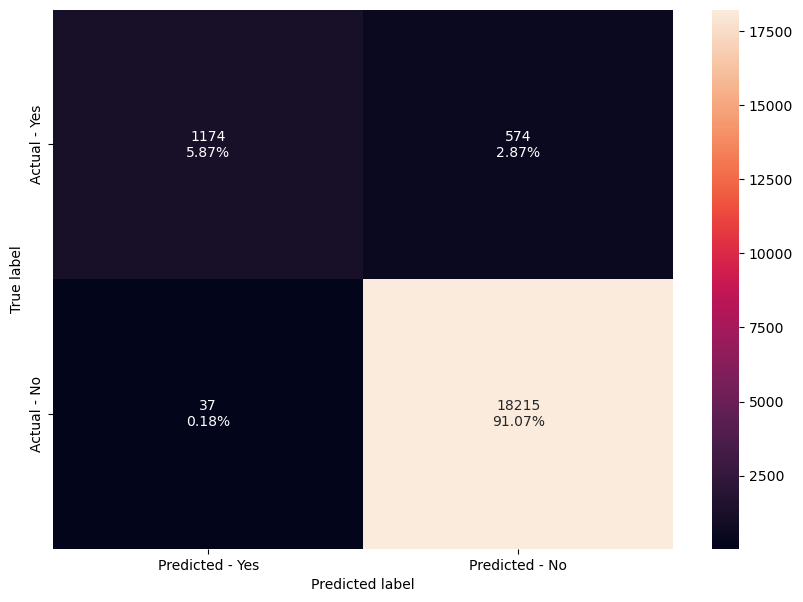

In [106]:
# Generate confusion matrix
make_confusion_matrix(voting_classifier, y_test)

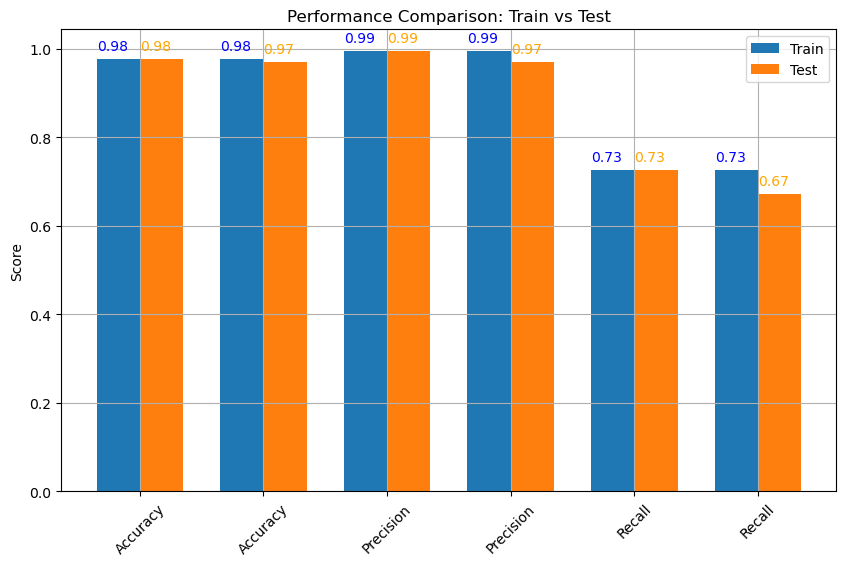

In [107]:
# Plot performance metrics
train_metrics = get_metrics_score_train_test(voting_classifier, X_train, y_train, X_train, y_train)
test_metrics = get_metrics_score_train_test(voting_classifier, X_train, y_train, X_test, y_test)
plot_metrics_bar(train_metrics, test_metrics, 'Performance Comparison: Train vs Test')

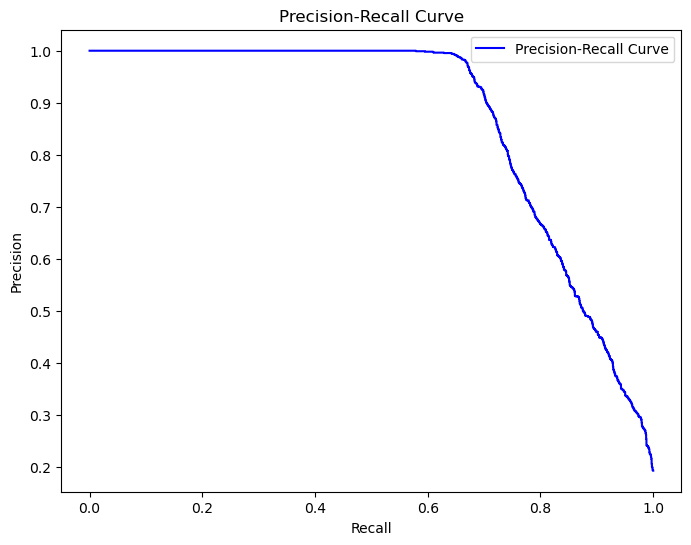

In [108]:
plot_precision_recall_curve(voting_classifier, X_test, y_test)

## Insights and Overivew: 

- Accuracy: The ensemble technique achieves impressive accuracy scores on both the training and test datasets. It attains a train accuracy of approximately 97.65% and a test accuracy of around 96.95%. This indicates that the ensemble method effectively classifies the majority of instances correctly, showcasing its proficiency in distinguishing between cases with and without diabetes.


- Precision: The ensemble technique demonstrates high precision, particularly evident in the training set where it achieves a precision score of about 99.37%. This highlights the model's exceptional ability to accurately predict positive instances. Even on the test set, the precision remains high, with a score of approximately 96.87%, indicating the model's effectiveness in making precise positive predictions.


- Recall: While the ensemble model exhibits a high recall of around 72.63% on the training set, showcasing its capability to capture a significant proportion of actual positive instances, the recall slightly drops to approximately 67.28% on the test set. This slight decline suggests some challenges in generalizing the model's ability to identify positive instances to unseen data. However, the ensemble technique still maintains a relatively high recall score, indicating its ability to effectively capture positive instances despite the drop in performance on the test set.


- The matrix in the Ensemble is all over the same output as the rest of the models above where the true predictions are identical. 

## Importing functions for Comparison

In [109]:
# Create a DataFrame to store the scores
scores_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 
                                   'Test Precision', 'Train Recall', 'Test Recall'])

# Add Logistic Regression scores
scores_df = scores_df.append({'Model': 'Logistic Regression',
                              'Train Accuracy': logistic_regression_score['Train Accuracy'],
                              'Test Accuracy': logistic_regression_score['Test Accuracy'],
                              'Train Precision': logistic_regression_score['Train Precision'],
                              'Test Precision': logistic_regression_score['Test Precision'],
                              'Train Recall': logistic_regression_score['Train Recall'],
                              'Test Recall': logistic_regression_score['Test Recall']},
                              ignore_index=True)

# Add KNN scores
scores_df = scores_df.append({'Model': 'KNN',
                              'Train Accuracy': knn_score['Train Accuracy'],
                              'Test Accuracy': knn_score['Test Accuracy'],
                              'Train Precision': knn_score['Train Precision'],
                              'Test Precision': knn_score['Test Precision'],
                              'Train Recall': knn_score['Train Recall'],
                              'Test Recall': knn_score['Test Recall']},
                              ignore_index=True)

# Add Random Forest scores
scores_df = scores_df.append({'Model': 'Random Forest',
                              'Train Accuracy': random_forest_score['Train Accuracy'],
                              'Test Accuracy': random_forest_score['Test Accuracy'],
                              'Train Precision': random_forest_score['Train Precision'],
                              'Test Precision': random_forest_score['Test Precision'],
                              'Train Recall': random_forest_score['Train Recall'],
                              'Test Recall': random_forest_score['Test Recall']},
                              ignore_index=True)

# Add Gradient Boosting scores
scores_df = scores_df.append({'Model': 'Gradient Boosting',
                              'Train Accuracy': gradient_boost_score['Train Accuracy'],
                              'Test Accuracy': gradient_boost_score['Test Accuracy'],
                              'Train Precision': gradient_boost_score['Train Precision'],
                              'Test Precision': gradient_boost_score['Test Precision'],
                              'Train Recall': gradient_boost_score['Train Recall'],
                              'Test Recall': gradient_boost_score['Test Recall']},
                              ignore_index=True)

# Add AdaBoost scores
scores_df = scores_df.append({'Model': 'AdaBoost',
                              'Train Accuracy': ada_boost_score['Train Accuracy'],
                              'Test Accuracy': ada_boost_score['Test Accuracy'],
                              'Train Precision': ada_boost_score['Train Precision'],
                              'Test Precision': ada_boost_score['Test Precision'],
                              'Train Recall': ada_boost_score['Train Recall'],
                              'Test Recall': ada_boost_score['Test Recall']},
                              ignore_index=True)

# Add Ensemble model scores
scores_df = scores_df.append({'Model': 'Ensemble',
                              'Train Accuracy': ensemble_score['Train Accuracy'],
                              'Test Accuracy': ensemble_score['Test Accuracy'],
                              'Train Precision': ensemble_score['Train Precision'],
                              'Test Precision': ensemble_score['Test Precision'],
                              'Train Recall': ensemble_score['Train Recall'],
                              'Test Recall': ensemble_score['Test Recall']},
                              ignore_index=True)

In [110]:
# Define the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting', 'AdaBoost']

# Extract the scores for each metric
train_accuracy = [logistic_regression_score['Train Accuracy'], knn_score['Train Accuracy'], 
                  random_forest_score['Train Accuracy'], gradient_boost_score['Train Accuracy'], 
                  ada_boost_score['Train Accuracy']]
test_accuracy = [logistic_regression_score['Test Accuracy'], knn_score['Test Accuracy'], 
                 random_forest_score['Test Accuracy'], gradient_boost_score['Test Accuracy'], 
                 ada_boost_score['Test Accuracy']]
train_precision = [logistic_regression_score['Train Precision'], knn_score['Train Precision'], 
                   random_forest_score['Train Precision'], gradient_boost_score['Train Precision'], 
                   ada_boost_score['Train Precision']]
test_precision = [logistic_regression_score['Test Precision'], knn_score['Test Precision'], 
                  random_forest_score['Test Precision'], gradient_boost_score['Test Precision'], 
                  ada_boost_score['Test Precision']]
train_recall = [logistic_regression_score['Train Recall'], knn_score['Train Recall'], 
                random_forest_score['Train Recall'], gradient_boost_score['Train Recall'], 
                ada_boost_score['Train Recall']]
test_recall = [logistic_regression_score['Test Recall'], knn_score['Test Recall'], 
               random_forest_score['Test Recall'], gradient_boost_score['Test Recall'], 
               ada_boost_score['Test Recall']]

# Define the ensemble model scores (assuming you have calculated them already)
ensemble_train_accuracy = ensemble_score['Train Accuracy']
ensemble_test_accuracy = ensemble_score['Test Accuracy']
ensemble_train_precision = ensemble_score['Train Precision']
ensemble_test_precision = ensemble_score['Test Precision']

# Append ensemble model scores to the existing lists
models.append('Ensemble')
train_accuracy.append(ensemble_train_accuracy)
test_accuracy.append(ensemble_test_accuracy)
train_precision.append(ensemble_train_precision)
test_precision.append(ensemble_test_precision)

def plot_model_comparison(models, train_accuracy, test_accuracy, train_precision, test_precision):
    """
    Plot a comparison of model performance metrics (accuracy and precision) for different models.

    Parameters:
    models (list): List of model names.
    train_accuracy (list): List of train accuracy scores for each model.
    test_accuracy (list): List of test accuracy scores for each model.
    train_precision (list): List of train precision scores for each model.
    test_precision (list): List of test precision scores for each model.
    """
    # Create subplots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    # Plot Train Accuracy
    axes[0].bar(models, train_accuracy, color='blue', alpha=0.6)
    axes[0].set_title('Train Accuracy')
    axes[0].set_ylabel('Accuracy')

    # Plot Test Accuracy
    axes[1].bar(models, test_accuracy, color='green', alpha=0.6)
    axes[1].set_title('Test Accuracy')
    axes[1].set_ylabel('Accuracy')

    # Plot Train Precision and Test Precision
    width = 0.35
    x = range(len(models))
    axes[2].bar(x, train_precision, width, label='Train Precision', color='orange', alpha=0.6)
    axes[2].bar([i + width for i in x], test_precision, width, label='Test Precision', color='red', alpha=0.6)
    axes[2].set_title('Train vs Test Precision')
    axes[2].set_ylabel('Precision')
    axes[2].set_xticks([i + width / 2 for i in x])
    axes[2].set_xticklabels(models)
    axes[2].legend()

    # Adjust layout
    plt.tight_layout()

    # Get the current figure and store it in a variable
    comparison_plot = plt.gcf()

    # Show the plot
    plt.show()

## Comparisons 

In [111]:
scores_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall
0,Logistic Regression,0.952825,0.94920,0.794153,0.779389,0.595379,0.584096
1,KNN,0.963213,0.94940,0.936112,0.862205,0.605450,0.501144
2,Random Forest,0.999275,0.96800,0.999552,0.944623,0.991854,0.673341
3,Gradient Boosting,0.972762,0.97050,0.987631,0.984925,0.685871,0.672769
4,AdaBoost,0.972538,0.96990,0.970850,0.963592,0.695498,0.681350
5,Ensemble,0.976562,0.96945,0.993723,0.969447,0.726896,0.671625


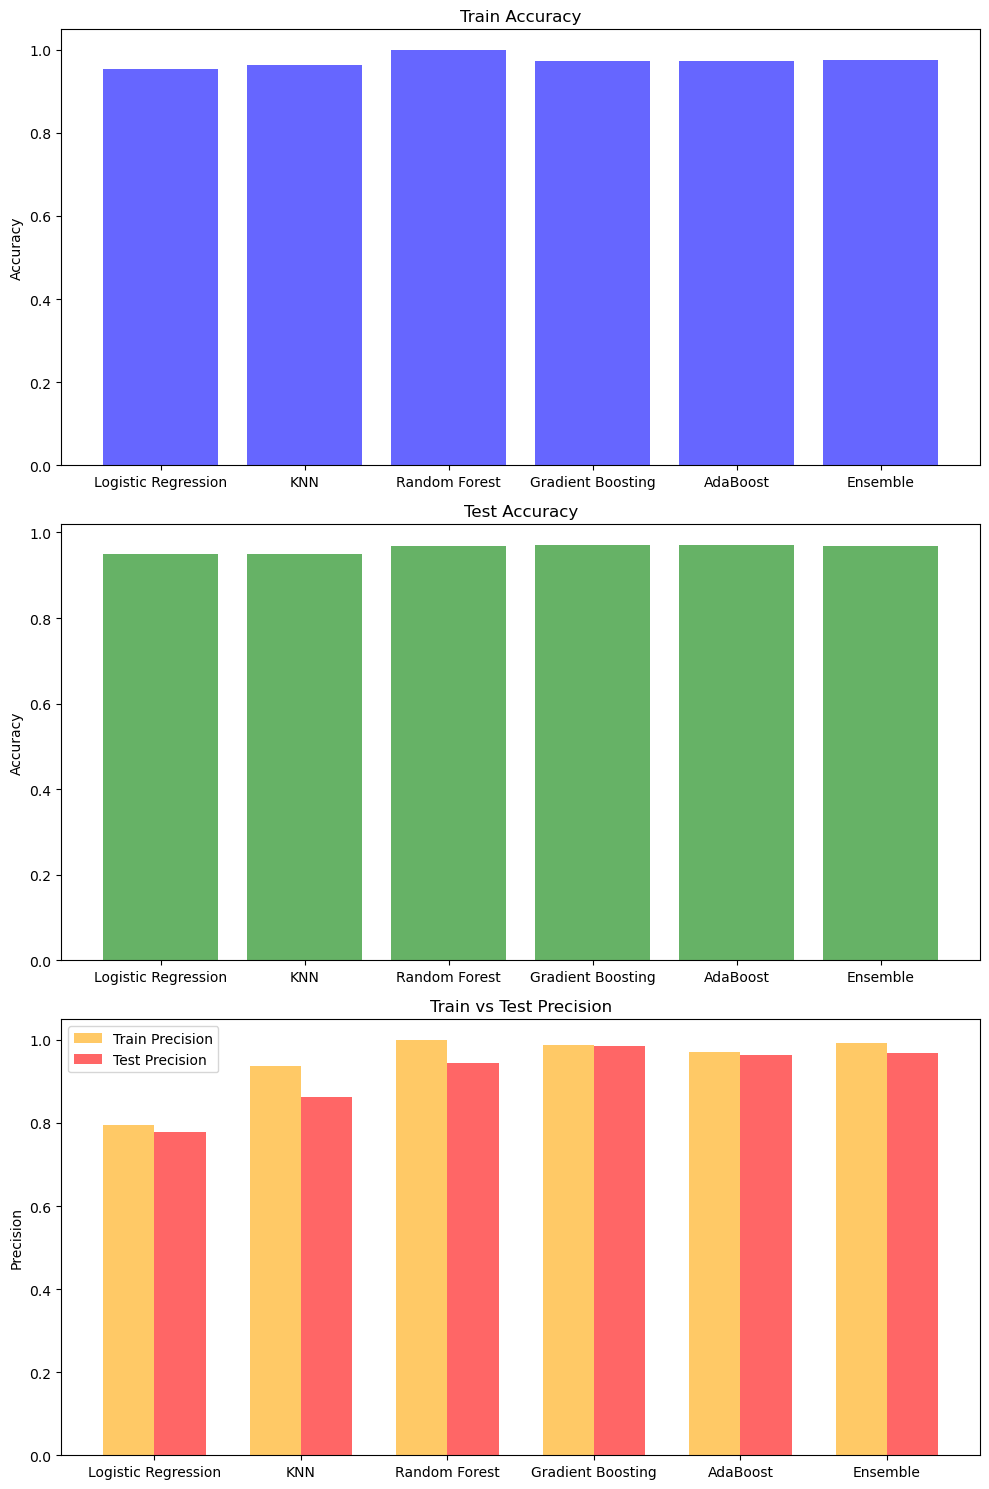

In [112]:
# Plot the comparison
plot_model_comparison(models, train_accuracy, test_accuracy, train_precision, test_precision)

## Conclusions:

- After analyzing the performance of each model, we found that all of them: - Logistic Regression, KNN, Random Forest, Gradient Boosting, AdaBoost, and Ensemble of the models — showed strong accuracy. This means they're good at correctly labeling instances as either having or not having diabetes. It's like they're getting most of the answers right on a test.

- Looking at precision, which tells us how many of the positive predictions were actually correct, Random Forest stood out. It did a great job of avoiding false alarms, especially important in medical scenarios like diabetes diagnosis. However, the ensemble model, which combines predictions from multiple models, also showed impressive precision. This suggests that teamwork can improve accuracy in spotting diabetes.

- When it comes to recall, which measures how many actual positive instances the models caught, Random Forest was again a top performer. It managed to find many of the real positive cases. But the ensemble model was close behind, showing it's also good at catching diabetes cases accurately. This means the ensemble model is sensitive enough to detect diabetes cases effectively.

- In conclusion, while each individual model exhibits strong predictive power, the ensemble model emerges as the standout performer. By harnessing the diverse predictions of multiple models, the ensemble approach offers a comprehensive solution that excels in accuracy, precision, and recall. Its ability to leverage the strengths of various algorithms while mitigating their weaknesses positions the ensemble model as the optimal choice for predicting diabetes. Thus, healthcare practitioners and researchers can confidently rely on the ensemble model's predictions to facilitate timely interventions and improve patient outcomes in the realm of diabetes diagnosis and management.